<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Análisis exploratorio</a></span><ul class="toc-item"><li><span><a href="#Variable-respuesta" data-toc-modified-id="Variable-respuesta-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Variable respuesta</a></span></li><li><span><a href="#Variables-predictoras" data-toc-modified-id="Variables-predictoras-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variables predictoras</a></span><ul class="toc-item"><li><span><a href="#Variables-numéricas" data-toc-modified-id="Variables-numéricas-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Variables numéricas</a></span></li><li><span><a href="#Correlación-entre-variables-numéricas" data-toc-modified-id="Correlación-entre-variables-numéricas-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Correlación entre variables numéricas</a></span></li><li><span><a href="#Variables-categóricas" data-toc-modified-id="Variables-categóricas-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Variables categóricas</a></span></li></ul></li></ul></li><li><span><a href="#Preprocesado" data-toc-modified-id="Preprocesado-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocesado</a></span></li></ul></div>

cvriables continuas -- regresion lineal

variables categóricas -- regresión logística

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd


# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
plt.rcParams["figure.figsize"] = (10,8)

In [ ]:
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

Cargamos los datos sin el preprocesado. Eso si, está limpia la columna de `gender`, `state` que estaba un poco sucia. 

In [3]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- variables continuas:
  - `charges`
  - `bmi`
  - `age`
- variables discretas:
  - `sex`
  - `children`
  - `region`


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


hay que identificar la variable respuesta -- la que se va a intentar predecir. en este caso, será `median_home_val`.

# Análisis exploratorio

Antes de entrenar un modelo predictivo, o incluso antes de realizar cualquier cálculo con un nuevo conjunto de datos, es muy importante realizar una exploración descriptiva de los mismos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Algunos ejemplos frecuentes son:

Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.

Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.

Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.

Además, este análisis inicial puede dar pistas sobre qué variables son adecuadas como predictores en un modelo (más sobre esto en los siguientes apartados).

1. ver que tengo en el df y los tipos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


2. ver el número de nulos que tengo en el dataset y ver que puedo hacer con ello

una columna es quitable en cuanto a úmero de nulos será el 60%-70% de valores nulos

In [5]:
# Número de datos nulos por columna
# ==============================================================================
df.isnull().sum() / df.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

3. check duplicados -- si hay filas duplicadas, te las zumbas

In [6]:
df.duplicated().sum() / df.shape[0]

0.0007473841554559044

4. check los tipos de datos

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


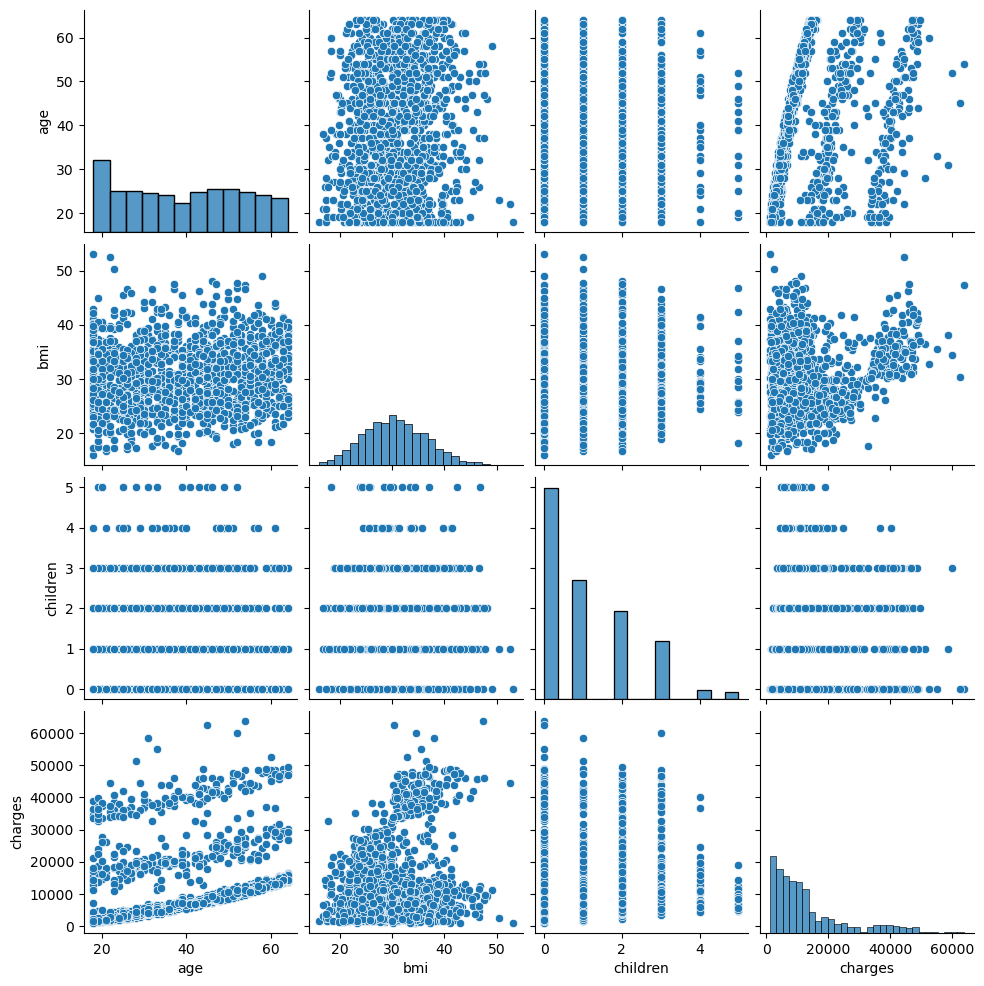

In [10]:
sns.pairplot(data=df);

## Variable respuesta

la variable respuesta en este caso será `charges`.

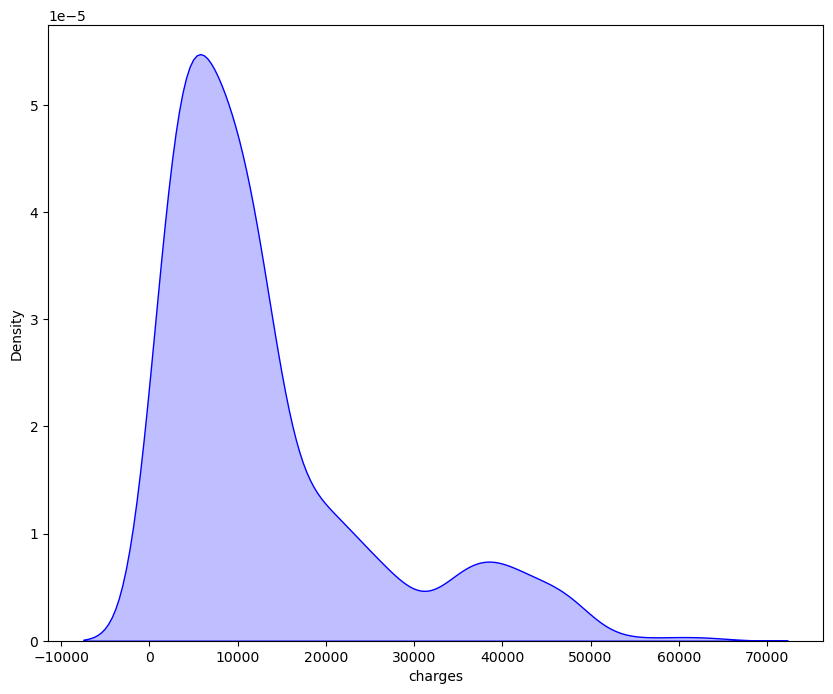

In [17]:
# vamos a ver visualmente como está distribuida la variable respuesta

##esto es un resumen un histograma

sns.kdeplot(
    df.charges, 
    color = "blue", 
    fill = True);

<AxesSubplot:xlabel='charges', ylabel='Count'>

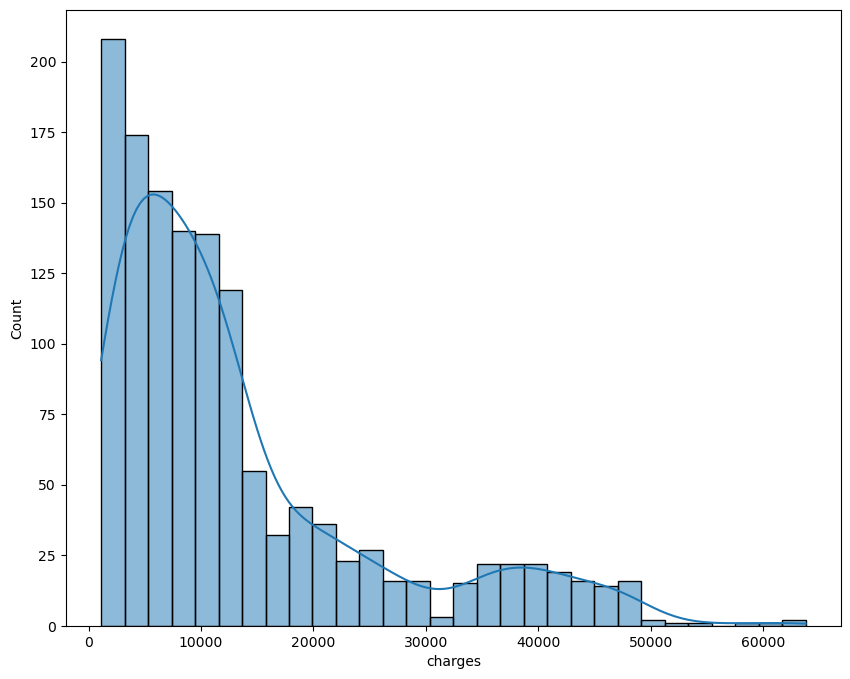

In [20]:
# cuantas casas tienen de media el valor que indica el eje x
sns.histplot(data = df, x = 'charges', kde = True);

no es una normal porque no es simétrica -- tiene un sesgo hacia la izquierda.

otra de las soluciones posibles, sin transformar la gráfica sería dividir el conjunto de datos y quitarnos la parte de la derecha, ya que es la parte que no es simétrica de la dsitribución

In [ ]:
df.describe(include=np.number).T

## Variables predictoras

Al igual que con la variable respuesta debemos conocer como son nuestras variables predictoras, como se relacionan entre ellas y como lo hacen con la variable respuesta.

Vamos a ello: 

### Variables numéricas


In [ ]:
# exploramos cuáles son los principales estadísticos de las variables numéricas

df_numericas = df.select_dtypes(include = np.number).describe()
df_numericas

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (30,10))
axes = axes.flat
columnas = df_numericas.drop(['median_home_val'], axis = 1)  
for i, columns in enumerate(columnas.columns):
    sns.regplot(data = df, x = columns, y = 'median_home_val', ax = axes[i])
fig.tight_layout()

por un lado, cada punto sería una fila 

por otro lado, la línea es una línea de tendencia y ves como los valores se añejan o se acercan de la media (el sombreado es el error)

relación positiva -- el incremento de las variables indica el incremento de la variable a estudiar.

aka: más habitaciones, más precio.

ojo: la distribución se compara solo con la variable respuestas. si se trata de una distribución uniforme, no variarían los valores -- no estarían relacionadas.

In [ ]:
# me voy a cargar el valor más grande
df['dist_playa'].max()

In [ ]:
df = df[df['dist_playa'] < df['dist_playa'].max()]

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (30,10))
axes = axes.flat
columnas = df_numericas.drop(['median_home_val'], axis = 1)  
for i, columns in enumerate(columnas.columns):
    sns.regplot(data = df, x = columns, y = 'median_home_val', ax = axes[i])
fig.tight_layout()

sigue habiendo outliers -- pocas casas lejos de la playa me enturbian la muestra

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("median_home_val")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();


Como el objetivo del estudio es predecir el precio de las viviendas, el análisis de cada variable se hace también en relación a la variable respuesta precio. Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el precio y de qué forma.

In [ ]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("median_home_val")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["median_home_val"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

### Correlación entre variables numéricas

ojo: solo entre variables numéricas

correlación -- intensidad de la relación

covarianza -- dirección de la relación

In [ ]:
sns.heatmap(df.corr(), 
           cmap = "mako", 
           annot = True);

In [ ]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación
## creamos una matriz triangular

mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
mask


In [ ]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin = -1,
           vmax = 1
           );
## ojo, incluir los valores max y min para ver la escala total
## para ver si hay correlación entre dos variables, hay que ver si los valores están en torno al 0.6 - 0.7

tienes que mirar también la relación entre las variables predictoras -- si son muy similares, no tiene sentido usar las mismas; ahora, si está justificado puedes mantenerla.

sería interesante mantener:
- total_habitaciones

el resto de variables son muy correlacionadas entre sí

existen dos tipos de correlaciones:
- pearson -- relación lineal
- spearman -- relación no lineal --> no está tan clara la línea

El coeficiente de correlación de Pearson oscila entre –1 y +1:

- Un valor menor que 0 indica que existe una correlación negativa, es decir, que las dos variables están asociadas en sentido inverso. Cuánto más se acerca a -1, mayor es la fuerza de esa relación invertida (cuando el valor en una sea muy alto, el valor en la otra será muy bajo). Cuando es exactamente -1, eso significa que tienen una correlación negativa perfecta.


- Un valor mayor que 0 indica que existe una correlación positiva. En este caso las variables estarían asociadas en sentido directo. Cuanto más cerca de +1, más alta es su asociación. Un valor exacto de +1 indicaría una relación lineal positiva perfecta.


- Finalmente, una correlación de 0, o próxima a 0, indica que no hay relación lineal entre las dos variables.

Existe bastante consenso a la hora de interpretar los valores del coeficiente de correlación de Pearson utilizando los siguientes criterios (y considerando los valores absolutos):

- Entre 0 y 0.10: correlación inexistente


- Entre 0.10 y 0.29: correlación débil


- Entre 0.30 y 0.60: correlación moderada


- Entre 0.60 y 1: correlación fuerte


**Otros tipos de correlación** 

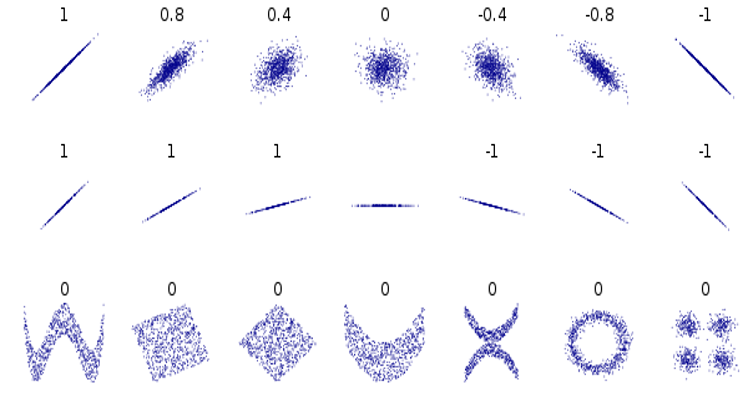

para comprobar la relación entre todas las variables, usaremos el pairplot

In [ ]:
sns.pairplot(data=df);

### Variables categóricas

In [ ]:
df_categoricas = df.select_dtypes(include='object')
df_categoricas.head()

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))

axes = axes.flat

for i, columna in enumerate(df_categoricas.columns):
    sns.countplot(data = df, 
                  x = columna, 
                  ax = axes[i]);

vamos a sacar el precio medio por estados y ver como se distribuyen los precios:

In [ ]:
df_relacion_cate = df.groupby('state')['median_home_val'].mean().reset_index()
df_relacion_cate.head()

In [ ]:
sns.barplot(data=df_relacion_cate, x = 'state', y = 'median_home_val');

In [ ]:
df_relacion_cate_gen = df.groupby('gender')['median_home_val'].mean().reset_index()
df_relacion_cate_gen.head()

In [ ]:
sns.barplot(data=df_relacion_cate_gen, x = 'gender', y = 'median_home_val');

es una variable categórica sin orden -- no influye el género en el valor del precio

esta distribución servirá para el encoding -- vemos que haciendo una categorización entre el valor mayor, los valores intermedios y los valores más bajos

In [ ]:
# Gráfico para cada variable cualitativa
# ==============================================================================

fig, axes = plt.subplots(1, 2, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();


# Preprocesado

Aquí incluimos: 

- Gestión de **outliers**


- Gestión de **nulos**


- **Codificación** variables categóricas


- **Normalización** y **Estandarización**